In [42]:
import os
import string
import math
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
print("Loading the data for training the Model.....")
#ham1 and spam1 files contain 30 ham mails and spam mails in each file respectively 
# Every mail contains subject and body....

ham_files_location=os.listdir("ham1")     #ham1 filename where ham mails are stored.........
spam_files_location=os.listdir("spam1")   #spam1 filename where spam mails are stored.......
data=[]

# Load ham email.....
for file_path in ham_files_location:
    f = open("ham1/" + file_path, "r")
    text = str(f.read())
    data.append([text, "HAM"]) #giving the HAM label for the ham mails....
    
# Load spam email.....
for file_path in spam_files_location:
    f = open("spam1/" + file_path, "r")
    text = str(f.read())
    data.append([text, "SPAM"]) #giving the SPAM label for spam mails....

data = np.array(data)
#print(data)
print("flag 1: loaded data") #Flag 1 to confirm that data is loaded....

Loading the data for training the Model.....
flag 1: loaded data


In [44]:
print("Preprocessing data i.e Cleaning the data for training and testing....")

punc=string.punctuation #storing all the special symbols 
print(punc)
sw=stopwords.words('english') #storing all the stopwords i.e. mostly used common words in english
                              #Ex: the and we our you etc...

for file in data:

    #Removing punctuations and symbols from email
    for item in punc:
        file[0]=file[0].replace(item,"")
    
    splittedWords=file[0].split()
    #print(splittedWords)
    #Lowercase all letters and remove stopwords
    newText=""
    for word in splittedWords:
        if word not in sw:
            word=word.lower()
            newText=newText + " " + word  #Take Backs all non-stopwords
    file[0]=newText

print("flag 2 : Preprocessed data") #flag 2 to confirm that data is cleaned for training

Preprocessing data i.e Cleaning the data for training and testing....
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
flag 2 : Preprocessed data


In [45]:
print("Splitting data into training and testing form......")

features=data[:,0]  #array containing all email text bodyy.....
labels=data[:,1]    #array containing all labels that is spam or ham

training_data,test_data,training_labels,test_labels=\
    train_test_split(features,labels,test_size=0.27,random_state=42)

print("flag 3:data is splitted for training and testing....")
#flag 3 to confirm splitting of data....
print(math.sqrt(len(training_labels))) #deciding the K value 

Splitting data into training and testing form......
flag 3:data is splitted for training and testing....
6.557438524302


In [46]:
#Vectorization of splitted data i.e converting the text data into a numeric form
# Giving it a score based on occurences of a word

feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_features=feature_extraction.fit_transform(training_data)
X_test_features=feature_extraction.transform(test_data)
#print(X_train_features)
#print(X_test_features)
print("flag 4: to confirm data is transformed....")

flag 4: to confirm data is transformed....


In [47]:
#Fitting K-NN classifier to the training set  
#using Euclidean Distance for calculating the nearest neighbours
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train_features, training_labels)


KNeighborsClassifier()

In [48]:
#Predicting the Test_set Result
y_pred=classifier.predict(X_test_features)  
print(y_pred)

['SPAM' 'HAM' 'SPAM' 'SPAM' 'HAM' 'SPAM' 'SPAM' 'SPAM' 'HAM' 'HAM' 'SPAM'
 'SPAM' 'SPAM' 'HAM' 'SPAM' 'HAM' 'HAM']


In [49]:
#creating the confusion matrix
cm= confusion_matrix(test_labels,y_pred)
print(cm)

[[6 1]
 [1 9]]


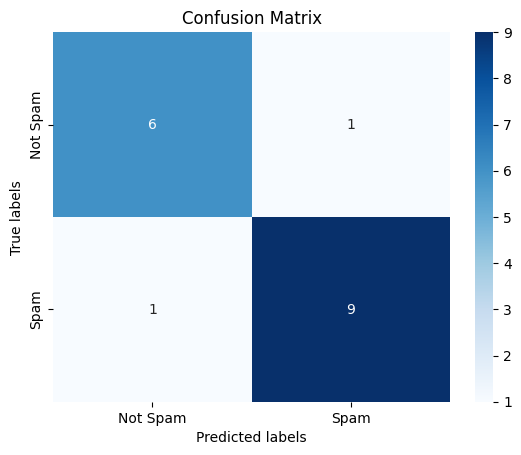

In [50]:
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);
plt.show()

In [51]:
#Accuracy of the model
print("Accuaracy:",metrics.accuracy_score(test_labels,y_pred))


Accuaracy: 0.8823529411764706


In [52]:
#Predicting the input mail using the trained model
input_mail=["Subject: get the best rate on a home loan !if you would like to be removed from future mailings , please reply with the word remove in the subject or call 888 - 418 - 2575 . let lenders compete for your business ! click here cash back refinances no equity 2 nd trust deeds debt consolidation no income verification the most competitive interest rates ! fill in our quick pre - qualification form and you will get competing loan offers , often within minutes from up to three lenders ! click here there is never any fee to consumers for using this service . copyright ?ffffa 9 1999 , 2000 eworld marketing , inc . 888 - 418 - 2575 this is not a solicitation or offer to lend money . eworld marketing is not a lender , broker or other financial intermediary . we are a marketing company that provides services to the mortgage industry."]
input_mail_features=feature_extraction.transform(input_mail)
prediction=classifier.predict(input_mail_features)
print(prediction)

['SPAM']


In [53]:
#saving the model
pickle_out=open("knnclassifier.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()

In [54]:
#saving the vectorizer
pickle.dump(feature_extraction, open('Vectorizer.pickle', 'wb'))

In [55]:
#training the machine learning logistic regression model

model=LogisticRegression()

In [56]:
#training the logistic regression model

model.fit(X_train_features, training_labels)

LogisticRegression()

In [57]:
#Predicting the input mail using the logistic regression trained model
input_mail=["Subject: get the best rate on a home loan !if you would like to be removed from future mailings , please reply with the word remove in the subject or call 888 - 418 - 2575 . let lenders compete for your business ! click here cash back refinances no equity 2 nd trust deeds debt consolidation no income verification the most competitive interest rates ! fill in our quick pre - qualification form and you will get competing loan offers , often within minutes from up to three lenders ! click here there is never any fee to consumers for using this service . copyright ?ffffa 9 1999 , 2000 eworld marketing , inc . 888 - 418 - 2575 this is not a solicitation or offer to lend money . eworld marketing is not a lender , broker or other financial intermediary . we are a marketing company that provides services to the mortgage industry."]
input_mail_features=feature_extraction.transform(input_mail)
prediction=model.predict(input_mail_features)
print(prediction)

['SPAM']


In [58]:
pickle_out=open("Regressionclassifier.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [59]:
#Creating the Naive-Bayes model
NBmodel=MultinomialNB()
NBmodel.fit(X_train_features, training_labels)

MultinomialNB()

In [60]:
#Predicting the input mail using the Naive Bayes trained model
input_mail=["Subject: get the best rate on a home loan !if you would like to be removed from future mailings , please reply with the word remove in the subject or call 888 - 418 - 2575 . let lenders compete for your business ! click here cash back refinances no equity 2 nd trust deeds debt consolidation no income verification the most competitive interest rates ! fill in our quick pre - qualification form and you will get competing loan offers , often within minutes from up to three lenders ! click here there is never any fee to consumers for using this service . copyright ?ffffa 9 1999 , 2000 eworld marketing , inc . 888 - 418 - 2575 this is not a solicitation or offer to lend money . eworld marketing is not a lender , broker or other financial intermediary . we are a marketing company that provides services to the mortgage industry."]
input_mail_features=feature_extraction.transform(input_mail)
prediction=NBmodel.predict(input_mail_features)
print(prediction)

['SPAM']


In [61]:
pickle_out=open("NBclassifier.pkl","wb")
pickle.dump(NBmodel,pickle_out)
pickle_out.close()